<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center><i>Algorithms for Discrete Mathematics</i>, year 2, semester 1</center>

# Experimental Maths 1: Primes and Euclid (with Solutions)


## Table of contents

- [1. Primes and factorization](#DistributionPrime)
 - [Prime numbers and divisibility](#DistributionPrime)
 - [Factorization](#Factorization)
 - [Euclid Algorithm and application](#EuclidAlgorithm)
- [2. Sums of squares](#SumsOfTwoSquares)
- [3. A mysterious function](#ChangeBasis)


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)


<a id="DistributionPrime"></a>
# 1. Primes and factorization
## Prime numbers and divisibility

We aim to investigate the distribution of primes among integers. Namely, how many prime numbers are there (approximately) between $1$ and $n$?

<div markdown=1 class="DoIt"> 

Write a boolean function IsPrime($n$) which returns `True` if and only $n$ is prime.<br>
<i>(In python $a\ (\mathrm{mod}\ p)$ is obtained with `a%p`.)</i>

In [3]:
def IsPrime(n):
    # input: integer n
    # output: True or False depending on whether n is prime or not
    if n==1:
        return False
    if n==2:
        return True
    elif n%2==0:
        return False
    factor=3
    while factor**2 < n+1:
        if n%factor == 0:
            return False 
        factor=factor+2
    return True

# Test
print(IsPrime(2))
print(IsPrime(1997))
print(IsPrime(1999))
print(IsPrime(2001))


True
True
True
False


Now we are ready for experiment. For $n\geq 2$, let $\pi(n)$ denote the number of primes less than $n$. For example, $\pi(11)=5$ since $2,3,5,7,11$ are prime.

<div markdown=1 class="DoIt">

1. Write a script which takes as input $n$ and returns the list $[\pi(2),\pi(3),\dots,\pi(n)]$.
2. Plot the function $n \mapsto \pi(n)$ (try $n=100,1000,10000$).

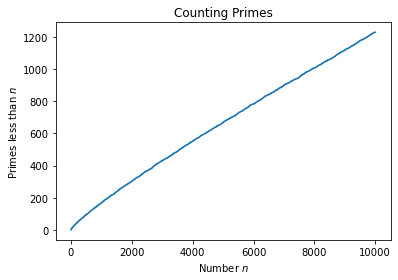

In [4]:
CountingPrimes=[0,1]
T=10000

NN=range(3,T)

for n in range(3,T,2):
    if IsPrime(n):
        CountingPrimes.append(CountingPrimes[-1]+1)
    else:
        CountingPrimes.append(CountingPrimes[-1])
    CountingPrimes.append(CountingPrimes[-1])

if T%2==0:
    CountingPrimes=CountingPrimes[:-1]
    
#print([n for n in range(1,T)])
#print(CountingPrimes)
    
plt.plot(range(1,T),CountingPrimes,label='pi')

#plt.plot(range(1,T),X/np.log(X+1))
plt.xlabel('Number $n$'),plt.ylabel('Primes less than $n$')
plt.title('Counting Primes')
plt.show()


<div markdown=1 class="DoIt"> Modify your previous plot to illustrate the <a href="https://en.wikipedia.org/wiki/Prime_number_theorem">Prime Number Theorem</a>:
$$
\pi(n)\sim \frac{n}{\log(n)}.
$$


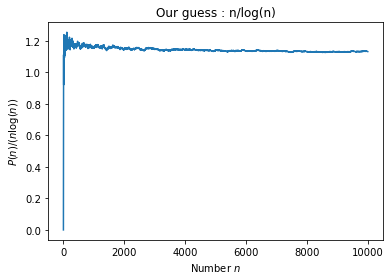

1.131950831715873


In [5]:
# By trial and errors we finally guess that pi(n) is close to n/log(n)
   
X=range(1,T)
plt.plot(range(1,T),CountingPrimes*np.log(X)/X)
plt.xlabel('Number $n$'),plt.ylabel('$P(n)/(n\log(n))$')
plt.title('Our guess : n/log(n)')
plt.show()
R=CountingPrimes[-1]*np.log(T)/(T+0.0)
print(R)


<div markdown=1 class="Answers"> 
According to the above plot, we have something like
$$
P(n) \sim C\times \frac{n}{\log(n)}
$$
where $C\approx 1.13$ is indeed close to $1$.

<a id="Factorization"></a>
## Factorization

<div markdown=1 class="DoIt"> Write a function `Factorize(n)` which returns the factorization of `n` into primes. For example your function should return:

```python
Factorize(2158884)
[2, 2, 3, 3, 7, 13, 659]
```

<i>Hint: Think recursive!</i>

In [6]:
def Factorize(n):
    # input: integer n
    # output: list of factors of n
    for factor in range(2,n): # Tests division by 2,3,...,n
        if n%factor == 0:
            return [factor]+Factorize(n//factor)
    return [n]

print(Factorize(2158884))


print([n for n in range(300) if len(Factorize(n))==5])

[2, 2, 3, 3, 7, 13, 659]
[32, 48, 72, 80, 108, 112, 120, 162, 168, 176, 180, 200, 208, 243, 252, 264, 270, 272, 280]


For $n\geq 2$ we introduce 
$$
F(n)=\text{Number of prime factors of $n$, counted with multiplicity}. 
$$
For example, $F(2158884)=7$.

<div markdown=1 class="DoIt"> Plot the function $n \mapsto F(n)$ (try $n=100,1000,5000$).

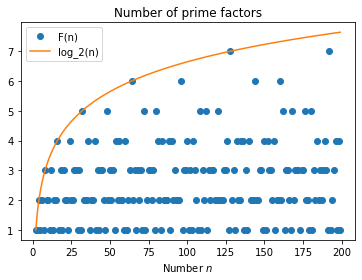

In [7]:
n_min=2
n_max=200
F=[len(Factorize(k)) for k in range(n_min,n_max)]
X=range(n_min,n_max)
#plt.figure(dpi= 200, facecolor='w', edgecolor='w')
plt.plot(X,F,'o',label='F(n)')
plt.plot(X,np.log(X)/np.log(2),label='log_2(n)')
plt.xlabel('Number $n$')
plt.title('Number of prime factors')
plt.legend()

plt.show()


<div markdown=1 class="DoIt"> <b>(Theory)</b><br>

1. Plot on the previous picture $n\mapsto F(n)$ and $n\mapsto \log_2(n)$ (logarithm in basis two).
2. Prove the following: 
  - <b>(lower bound)</b> There are infinitely many $n$'s for which $F(n)=\log_2(n)$.
  - <b>(upper bound)</b> $F(n)\leq \log_2(n)$ for every $n$.


<div markdown=1 class="Answers"> 

1. See the previous picture. One sees that $F(n)$ is always below $\log_2(n)$ but they seem to coincide at $n=2,4,8,16,32,...$

2. 
  - When $n=2^k$  is a power of two,
$$
F(2^k)=k=\log_2(n)
$$
Thus, for infinitely many integers (the powers of two), $F(n)=\log_2(n)$.<br>
  - For any integer $n$, let us write
<center>
`Factorize(n)` $= [a_1,a_2,\dots a_{F(n)}]$.
</center>
Every factor $a_i$ in the above decomposition is $\geq 2$. Therefore
$$
n=a_1\times a_2 \times \dots \times a_{F(n)} \geq 2^{F(n)},
$$
<i>i.e.</i> $F(n)\leq \log_2(n)$ for every $n$.<br>

<a id="EuclidAlgorithm"></a>
## The Euclid algorithm

We recall that Euclid's algorithm (which computes the gcd of two non-negative integers) relies on the fact that for every $a,b$ we have
$$
\begin{cases}
\mathrm{gcd}(a,b)&=\mathrm{gcd}(b,a\% b),\\
\mathrm{gcd}(a,0)&=a,\\
\end{cases}
$$
where $a\% b$ is the remainder of the euclidean division $a/b$.

<div markdown=1 class="DoIt">
Write a function `GreatestCommonDivisor(a,b)` which returns $\mathrm{gcd}(a,b)$ using the Euclid algorithm.

In [8]:
def GreatestCommonDivisor(a,b):
    # input: a,b: non-negative integers
    # output: returns the gcd of a and b
    if b==0:
        return a
    else:
        return GreatestCommonDivisor(b,a%b)
    
print(GreatestCommonDivisor(7*5*2,13*7*2))


14


Integers $m,n$ are said to be <i>coprime</i> if $\mathrm{gcd}(m,n)=1$. For example, $14,9$ are coprime.

In many references (see e.g. <a href="https://en.wikipedia.org/wiki/Coprime_integers#Probability_of_coprimality">Wikipedia</a>) one can read that
<center>
    "<i>The probability that two numbers randomly chosen are coprime is $\frac{6}{\pi^2}$.</i>"
</center>
Yet there is no obvious way to rigorously define what are "two numbers randomly chosen". A possible interpretation is the following:
$$
\frac{\mathrm{card}\left\{(i,j)\in[1,n]^2\text{ such that }\mathrm{gcd}(i,j)=1\right\}}{\mathrm{card}\left\{(i,j)\in[1,n]^2\right\}} \stackrel{n\to +\infty}{\to} \frac{6}{\pi^2}.
$$

<div markdown=1 class="DoIt"> 
Use your function `GreatestCommonDivisor` to draw a plot which illustrates the above convergence towards $\frac{6}{\pi^2}$ ($n=200$ should be enough).

0.60755


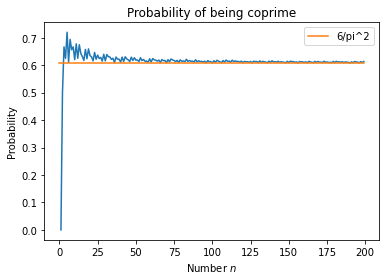

In [9]:
N=200 # Final value for the test

PairsOfCoprime=[0]

for n in range(2,N):
    NewCoprimeWith_n=0
    for k in range(1,n):
        if GreatestCommonDivisor(k,n)==1:
            NewCoprimeWith_n=NewCoprimeWith_n+1
    CoprimeWith_n=PairsOfCoprime[-1]+2*NewCoprimeWith_n
    PairsOfCoprime.append(CoprimeWith_n)

X=np.arange(1,N)
print(PairsOfCoprime[-1]/(N**2+0.0))
Claim=6/(np.pi**2)

plt.plot(X,PairsOfCoprime/(X**2+0.0))
plt.plot([0,n],[Claim,Claim],label='6/pi^2')
plt.xlabel('Number $n$'),plt.ylabel('Probability')
plt.title('Probability of being coprime')
plt.legend()
plt.show()


<div markdown=1 class="DoIt"> Write a function `GreatestCommonDivisor_3(a,b,c)` which returns the gcd of three numbers.

In [10]:
def GreatestCommonDivisor_3(a,b,c):
    # input: a,b,c: non-negative integers
    # output: returns the gcd of a,b,c
    return GreatestCommonDivisor(a,GreatestCommonDivisor(b,c))
    
GreatestCommonDivisor_3(11*4*10*7,4*10*3,5*4*10*17)

40

<a id="SumsOfTwoSquares"></a>
# 2. Sums of squares

We say that $n$ is a sum of two squares if there exist two integers $a,b\geq 1$ such that
$$
n=a^2+b^2.
$$
For example, $10=3^2+1^2$ is a sum of two squares while $11$ is not.

<div markdown=1 class="DoIt"> 

Write a function `SumsOfTwoSquares(n)` which returns the list of all decompositions of $n$ as a sum of two squares. For example:
```python
SumsOfTwoSquares(905)
[[8, 29], [11, 28], [28, 11], [29, 8]]
SumsOfTwoSquares(11)
[]
```

In [11]:
### Question 1.
def SumsOfTwoSquares(n):
    Decompositions=[]
    RootOfn=int(np.sqrt(n))
    for i in range(1,RootOfn+1):
        for j in range(1,n-i**2):
            SumOfSquares=i**2+j**2
            if SumOfSquares ==n:
                Decompositions.append([i,j])
    return Decompositions

# Tests
for k in [905,11,4,18]:
    print('Decomposition(s) of ',k, ':',SumsOfTwoSquares(k))




Decomposition(s) of  905 : [[8, 29], [11, 28], [28, 11], [29, 8]]
Decomposition(s) of  11 : []
Decomposition(s) of  4 : []
Decomposition(s) of  18 : [[3, 3]]


<div markdown=1 class="DoIt"> Find the smallest integer $n$ which has strictly more than $7$ decompositions as a sum of two squares.

In [12]:
n=1
CheckBoolean=False
while CheckBoolean==False:
    n=n+1
    k=len(SumsOfTwoSquares(n))
    if k>7:
        print('n = '+str(n)+', '+str(k)+' decompositions of n')
        print(SumsOfTwoSquares(n))
        CheckBoolean=True
        

n = 1105, 8 decompositions of n
[[4, 33], [9, 32], [12, 31], [23, 24], [24, 23], [31, 12], [32, 9], [33, 4]]


<div markdown=1 class="DoIt"> 

1. <b>(Theory)</b> Let $a$ be any integer. Prove that $a^2$ is always equal to $0$ or $1$ modulo $4$. 
2. <b>(Theory)</b> Deduce that $\bigg(n\equiv 3 \ (\mathrm{mod}\ 4)\bigg)$ $\Rightarrow$ $\bigg( n\text{ is not a sum of two squares }\bigg)$.<br>
3. Is the converse true?

<div markdown=1 class="Answers">

1. Here are the $4$ possible values for $a\ (\mathrm{mod}\ 4)$, and the corresponding value for $a^2\ (\mathrm{mod}\ 4)$.

<table>
            <tr>
                <td width="100"> $a\ (\mathrm{mod}\ 4)$</td>
                <td > $0$</td>
                <td> $1$</td>
                <td> $2$</td>
                <td> $3$</td>
            </tr>
            <tr>
                <td width="100"> $a^2\ (\mathrm{mod}\ 4)$</td>
                <td> $0$</td>
                <td> $1$</td>
                <td> $0$</td>
                <td> $1$</td>
            </tr>     

</table>
   
Hence $a^2$ is always equal to $0$ or $1$ mod $4$.

2. We have that $a^2+b^2 = 0+0$ or $1+0$ or $0+1$ or $1+1$ $\mathrm{mod}\ 4$. We have proved 
$$
n \text{ can be written as }a^2+b^2 \Rightarrow n \not\equiv 3 \ (\mathrm{mod}\ 4)
$$
which is the contraposite of the claimed assertion.

3. The converse is not true: according to the above script, $n=22$ is not the sum of two squares, even if $22\neq 3[4]$.

<a id="ChangeBasis"></a>
# 3. Bonus: A mysterious function

<div markdown=1 class="DoIt"> What does the following function return? Can you prove it?

In [13]:
def Mystery(MysteriousVariable):
    # input: ???
    # output: ???
    if MysteriousVariable==0:
        return []
    else:
        return Mystery(MysteriousVariable//2) + [MysteriousVariable%2]
    

<div markdown=1 class="Answers"> 
By testing a few cases one may conjecture that `Mystery(n)` returns (as a list) the decomposition of $n$ in basis two. To prove so let us write
$$
n=a_k2^k + a_{k-1}2^{k-1} + \dots +a_1\times 2+a_0
$$
where $a_i\in \{0,1\}$ are the decomposition in basis two. We have that
$$
\begin{align*}
n=2\times \left(\underbrace{a_k2^{k-1} + a_{k-1}2^{k-2} + \dots +a_1\times 1}_{=n//2}\right)+a_0,
\end{align*}
$$
where $a//2$ stands for the euclidian division, as in python. Finally the decomposition of $n$ is the concatenation of
* The decomposition of $n//2$
* $a_0= n\ \mathrm{mod} \ 2$.

## Change of basis

<div markdown=1 class="DoIt"> Write a function `ChangeBasis(a,b,n_InBasis_a)` which takes as inputs:

* Two basis $a,b$ (integers $\geq 2$)
* A list which gives the decomposition of some integer $n$ in basis $a$

and which returns the decomposition of $n$ in basis $b$.

For example
```python
ChangeBasis(5,2,[4,1])
[1, 0, 1, 0, 1]
```
(Since $[4,1]$ in basis $5$ is $21$ <i>i.e.</i> $[1, 0, 1, 0, 1]$.)

In [14]:
def BasisToTen(n_InBasis_b,b):
    # input: b: basis
    #    n_InBasis_b: decomposition of some integer n in basis b
    # output: integer n
    if n_InBasis_b == []:
        return 0
    else:
        return n_InBasis_b[-1] + b*BasisToTen(n_InBasis_b[0:-1],b)

def TenToBasis(n,b):
    # input: integer n, basis b
    # output: n in basis b
    if n==0:
        return []
    else:
        return TenToBasis(n//b,b) + [n%b]
    
def ChangeBasis(a,b,n_InBasis_a):
    # inputs: basis a,b, integer n in basis a (as a list)
    # output: n in basis b (as a list)
    n= BasisToTen(n_InBasis_a,a)
    return TenToBasis(n,b)

ChangeBasis(5,2,[4,1])


[1, 0, 1, 0, 1]